# Exploration 2

#### List of (more immediate) business questions:

* Q1. What are the top categories of products?
* Q2. For each category of product, what are the sub categories? E.g., Security software is a sub category of Software
* Q3. In each product category, what are all the brands ?
* Q4. How is rating stats (total reviews, average star rating, std deviations) for a given product, sub cat, brand
* Q5. How do these ratings change over time ?
* Q6. What are the span of dates reviews are submitted? Date range.
* Q7. Can we create an automatic rating system ? In: Comments/reviews in text -> Out: star rating: 1 to 5


#### My approach to this project:
* There are otherwise inclined automations due to its challenging nature and lack of time, are done for now manually but machine later 'NMLM' , a reference you will see from time to time in this project comments

In [ ]:

product_categories=["Apparel", "Automotive", "Baby","Beauty","Books","Camera","Ebook","Music","Software",
"Digital_Video","Digital_Video_Games","Electronics","Furniture","Gift_Card","Grocery","Health_Personal_Care",
"Home_Entertainment","Home_Improvement","Home","Jewelry","Kitchen","Lawn_and_Garden","Luggage",
"Major_Appliances","Mobile_Apps","Mobile_Electronics","Music","Musical_Instruments","Office_Products","Outdoors","PC",
"Personal_Care_Appliances","Pet_Products","Shoes", "Software","Sports","Tools","Toys","Video_DVD","Video_Games",
"Video", "Watches", "Wireless"]


In [4]:
# This is to prepare environment and import libraries
%matplotlib inline
import numpy as np
import pandas as pd
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
import os
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import PunktSentenceTokenizer
import random
import time
import pickle

In [5]:
brands={}
# Software brands, obtained for now manually, machine later NMLM from http://www.softwaremedia.com/credentials
brands['software']=["Acronis", "Autodesk", "AVG", "BitDefender", "Borland", "Business Objects", "CA", "Corel", "DeLorme", 
"Enfocus", "ESET", "FileMaker", "H&R Block", "Infinite Skills", "Insperity", "Intuit", "Kaspersky", "MakerBot", "McAfee", 
"Microsoft", "Microsoft Surface", "Nero", "Nuance", "Parallels", "Punch", "Quark", "QuickBooks", "Quicken", "Roxio", "Sage", 
"SoftwareMedia", "Sony", "StorageCraft", "Symantec", "Techsmith", "Thomson Reuters", "Trend Micro", "V7", "Veeam", "VMware" ]

In [6]:
raw_reviews=pd.read_csv('data/raw/amazon_reviews_us_Software_v1_00.tsv',delimiter='\t', encoding='latin-1')

In [7]:
len(raw_reviews)

341931

In [8]:
# Pare the size way down for prototyping , 
# tried [:60000]; [330000:]@185.47; [320000:330000]@(0, 137); [290000:320000]@(0, 903); [260000:290000]@(0, 836)
#   [200000:260000]@(0, 2611)
raw_reviews=raw_reviews[110000:190000]

In [9]:
categorical=raw_reviews.dtypes[raw_reviews.dtypes=="object"].index
raw_reviews[categorical].describe()

,marketplace,review_id,product_id,product_title,product_category,vine,verified_purchase,review_headline,review_body,review_date
count,80000,80000,80000,80000,80000,80000,80000,79999,80000,79991
unique,1,80000,10273,10061,1,2,2,61476,79377,675
top,US,RREN2TDL4HFX2,B009CCXJ0A,TurboTax Deluxe Federal + E-File + State 2012,Software,N,Y,Great Product,nice softweaere it works in my vista or seven...,2013-10-02
freq,80000,1,2081,2081,80000,76483,59266,401,11,333


In [10]:
# Related to *** Q6 ***
#   For Software, the earliest is 1998-09-21, the last reviews were on 2015-08-31
#raw_reviews["review_date"].sort_values().unique()

In [11]:
# To simplify the investigation, dropping the unused (for now) fields
raw_reviews=raw_reviews.drop(['marketplace','review_id','product_parent','helpful_votes','total_votes','vine','verified_purchase'], axis=1)

In [12]:
# Add sentiment column to the dataframe based on star_rating 
raw_reviews['sentiment'] = raw_reviews.star_rating.map({1:'Negative', 2:'Negative', 3:'Neutral', 4:'Positive', 5:'Positive'})

In [13]:
categorical=raw_reviews.dtypes[raw_reviews.dtypes=="object"].index
raw_reviews[categorical].describe()

,product_id,product_title,product_category,review_headline,review_body,review_date,sentiment
count,80000,80000,80000,79999,80000,79991,80000
unique,10273,10061,1,61476,79377,675,3
top,B009CCXJ0A,TurboTax Deluxe Federal + E-File + State 2012,Software,Great Product,nice softweaere it works in my vista or seven...,2013-10-02,Positive
freq,2081,2081,80000,401,11,333,52625


In [14]:
# testtext=raw_reviews.sort_values(by=['product_id','review_date'])['review_body'][0]

In [15]:
stop_words = set(stopwords.words("english"))

In [16]:
# tokenized=word_tokenize(testtext)

In [17]:
# Name Entity Recognition, in order to extract brand names and product names 
def process_content2():
    try:
        for s in raw_reviews['product_title'][:1]:
            words = nltk.word_tokenize(s)
            filtered = [w for w in words if not w in stop_words]
            tagged = nltk.pos_tag(filtered)
            print(tagged)
            #namedEnt = nltk.ne_chunk(tagged, binary=False) # Binary=True to remove categorization of the entity
            #print(namedEnt)
            #namedEnt.draw()
    except Exception as e:
        print(str(e))

In [18]:
process_content2()

[('Trend', 'NNP'), ('Micro', 'NNP'), ('Titanium', 'NNP'), ('Maximum', 'NNP'), ('Security', 'NNP'), ('2013', 'CD'), ('3-Users', 'NNS'), ('[', 'JJ'), ('Old', 'NNP'), ('Version', 'NNP'), (']', 'NN')]


In [19]:
sample = ','.join(raw_reviews['product_title'])

In [20]:
# entity_names and its dependencies below are codes found on the Internet
sentences = nltk.sent_tokenize(sample)
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
tagged_sentences = [nltk.pos_tag(sentence) for sentence in tokenized_sentences]
chunked_sentences = nltk.ne_chunk_sents(tagged_sentences, binary=True)  # A Python generator

In [21]:
def extract_entity_names(t):
    entity_names = []
    
    if hasattr(t, 'label') and t.label:
        if t.label() == 'NE':
            entity_names.append(' '.join([child[0] for child in t]))
        else:
            for child in t:
                entity_names.extend(extract_entity_names(child))
                
    return entity_names

In [22]:
entity_names = []
for tree in chunked_sentences:
    entity_names.extend(extract_entity_names(tree))

In [23]:
# Related to Q3 , these captures brand and product names
# TODOTODO: further clean out name entities, also separate the list to brands, product type(subcategory), model name etc
entity_names_set=set(entity_names)

In [24]:
len(entity_names_set)

8430

In [50]:
from wordcloud import WordCloud, STOPWORDS
big_string = ','.join(entity_names)
type(big_string)
wc = WordCloud().generate(big_string)

(-0.5, 399.5, 199.5, -0.5)

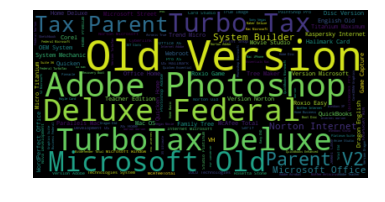

In [26]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

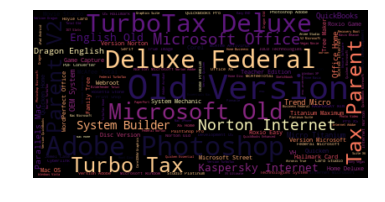

In [27]:
wc = WordCloud(max_font_size=40, colormap='magma').generate(big_string)
plt.figure()
# plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [28]:
from nltk.classify import SklearnClassifier
from sklearn.model_selection import train_test_split
from subprocess import check_output

In [29]:
train, test = train_test_split(raw_reviews, test_size = 0.2)
train = train[train.star_rating != 3]  # Avoid neutral sentiment ,i.e., out of the 5 stars, 1,2 negative, 4,5 positive
print("Training size: ", len(train))
print("Testing size : ", len(test))

Training size:  58143
Testing size :  16000


In [30]:
train_pos = train[ train['star_rating'] > 3]
train_pos_product_title = train_pos['product_title']
train_pos_review_headline = train_pos['review_headline']
train_pos_review_body = train_pos['review_body']
train_neg = train[ train['star_rating'] < 3]
train_neg_product_title = train_neg['product_title']
train_neg_review_headline = train_neg['review_headline']
train_neg_review_body = train_neg['review_body']

# TODOTODO: Next is to filter for and only use Named entity, for brand and product sentiments


In [31]:
# Word cloud generate and draw
def wordcloud_draw(word_list, color = 'black'):
    words = ','.join(str(item) for item in word_list)
    cleaned_word = words
    '''
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                                ])
    '''
    exclude_these = list(STOPWORDS) 
    exclude_these.extend(['br']) # Temporary fix, should really clean the data to start with
    wordcloud = WordCloud(stopwords=exclude_these,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


In [32]:
##print("POSITIVE Product Title")
##wordcloud_draw(train_pos_product_title, 'white')

In [33]:
## print("POSITIVE Review Headline")
## wordcloud_draw(train_pos_review_headline, 'white')

In [34]:
## print("POSITIVE Review Body")
## wordcloud_draw(train_pos_review_body, 'white')

In [35]:
## print("NEGATIVE Product Title")
##  wordcloud_draw(train_neg_product_title)

In [36]:
# print("NEGATIVE Review Headline")
# wordcloud_draw(train_neg_review_headline)

In [37]:
# print("NEGATIVE Review Body")
# wordcloud_draw(train_neg_review_body)

In [38]:
stopwords_set = set(stopwords.words("english"))

In [39]:
train['exp'] = train['review_headline'].astype(str).str.split()

In [40]:
reviews = []
for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.exp if len(e) >= 3]
    '''
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    '''
    words_cleaned = words_filtered
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    reviews.append((words_without_stopwords,row.sentiment))

In [41]:
#reviews

In [42]:
test_pos = test[ test['sentiment'] == 'Positive']
test_pos_product_title = test_pos['product_title']
test_pos_review_headline = test_pos['review_headline']
test_pos_review_body = test_pos['review_body']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg_product_title = test_neg['product_title']
test_neg_review_headline = test_neg['review_headline']
test_neg_review_body = test_neg['review_body']

In [43]:
# Extracting word features
def get_words_in_reviews(reviews):
    all = []
    for (words, sentiment) in reviews:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features

# As dictionary keys 
w_features = get_word_features(get_words_in_reviews(reviews))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)  # should contains be containts ?
    return features

In [44]:
#wordcloud_draw(w_features)

In [45]:
# Training the Naive Bayes classifier
start_time = time.time()
training_set = nltk.classify.apply_features(extract_features,reviews)
duration = time.time() - start_time
print("Duration 1: ", duration)

In [46]:
start_time = time.time()
classifier = nltk.NaiveBayesClassifier.train(training_set)
duration = time.time() - start_time
print("Duration 2: ", duration) 

In [47]:
#classifier_file = open('nbClassifier4SW', "rb")
#classifier = pickle.load(classifier_file)
#classifier_file.close()

In [48]:
##save_classifier = open("nbClassifier4SW", "wb")
##pickle.dump(classifier, save_classifier)
##save_classifier.close()

In [49]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg_review_headline: 
    try: 
        res =  classifier.classify(extract_features(obj.split()))
        if(res == 'Negative'): 
            neg_cnt = neg_cnt + 1
    except:
        print("Problem processing: ", obj)
        

for obj in test_pos_review_headline: 
    try:
        res =  classifier.classify(extract_features(obj.split()))
        if(res == 'Positive'): 
            pos_cnt = pos_cnt + 1
    except:
        print("Problem processing", obj)

print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))    



[Negative]: 4025/1766 
[Positive]: 10469/9438 
